# Praca domowa 6
Julia Strzelczyk, 327221

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Opis zbioru danych
Zbiór danych dotyczy badania poziomu szczęścia na świecie w 2024 roku.

Opis kolumn:
- Country name: Nazwa kraju.
- Regional indicator: Region, do którego należy dane państwo.
- Ladder score: Wynik szczęścia dla każdego kraju, oparty na odpowiedziach z Drabiny Cantrila, gdzie ankietowani proszeni są o wyobrażenie sobie drabiny, w której najlepsze możliwe życie to dla nich liczba 10, a najgorsze możliwe życie to liczba 0.
- upperwhisker: Górna granica wyniku szczęścia.
- lowerwhisker: Dolna granica wyniku szczęścia.
- Log GDP per capita: Logarytm naturalny PKB na mieszkańca kraju, skorygowany o parytet siły nabywczej (PSN) w celu uwzględnienia różnic w kosztach utrzymania między krajami.
- Social support: Średnia krajowa odpowiedzi binarnych (0 lub 1 oznaczające „nie/tak”) na pytanie o posiadanie krewnych lub przyjaciół, na których można polegać w trudnych chwilach.
- Healthy life expectancy: Średnia liczba lat, którą noworodek żyłby w dobrym zdrowiu, na podstawie współczynników umieralności i oczekiwanej długości życia w różnym wieku.
- Freedom to make life choices: Średnia krajowa odpowiedzi na pytanie o zadowolenie z wolności wyboru, co zrobić ze swoim życiem.
- Generosity: Reszta z regresji średniej krajowej odpowiedzi na pytanie o przekazywanie pieniędzy na cele charytatywne w stosunku do PKB na mieszkańca.
- Perceptions of corruption: Średnia krajowa odpowiedzi na pytania dotyczące postrzeganego zakresu korupcji w rządzie i przedsiębiorstwach.
- Dystopia + residual: Dystopia to wyimaginowany kraj z najmniej szczęśliwymi ludźmi na świecie, używany jako punkt odniesienia do porównań. Wynik dystopia + wynik rezydualny jest kombinacją wyniku dystopii i niewyjaśnionej reszty dla każdego kraju, co gwarantuje, że łączny wynik jest zawsze dodatni. Każdy z tych czynników wpływa na ogólny wynik szczęścia, ale Dystopia + wartość rezydualna to punkt odniesienia, który gwarantuje, że żaden kraj nie uzyska niższego wyniku niż hipotetyczna Dystopia

Dane pochodzą ze strony: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

In [2]:
data = pd.read_csv('C:/Users/acer/Downloads/World-happiness-report-2024.csv')

In [3]:
data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


Wielkość zbioru danych:

In [4]:
data.shape

(143, 12)

Typy zmiennych w nim występujących:

In [5]:
data.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

### Statystyki

In [6]:
data.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


### Analiza zmiennych w zależności od przynależności do grupy

In [7]:
df = data.groupby(["Regional indicator"])[["Ladder score"]].agg(["min","mean", "median", "max", "std"])
df

Ladder score                           \
                                            min      mean  median    max   
Regional indicator                                                         
Central and Eastern Europe                5.304  6.170941  6.2570  6.822   
Commonwealth of Independent States        4.873  5.538500  5.5845  6.195   
East Asia                                 5.316  5.934333  6.0155  6.503   
Latin America and Caribbean               5.607  6.143368  6.1880  6.955   
Middle East and North Africa              2.707  5.199941  4.9750  7.341   
North America and ANZ                     6.725  6.927750  6.9645  7.057   
South Asia                                1.721  3.895667  3.9760  5.158   
Southeast Asia                            4.341  5.551889  5.9750  6.523   
Sub-Saharan Africa                        3.186  4.329686  4.3770  5.816   
Western Europe                            5.934  6.841650  6.8660  7.741   

                                              
                                         std  
Regional indicator                            
Central and Eastern Europe          0.494803  
Commonwealth of Independent States  0.480649  
East Asia                           0.398773  
Latin America and Caribbean         0.376936  
Middle East and North Africa        1.260354  
North America and ANZ               0.151476  
South Asia                          1.177069  
Southeast Asia                      0.779519  
Sub-Saharan Africa                  0.704075  
Western Europe                      0.538030

### Rozkład zmiennych w zbiorze danych

In [8]:
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

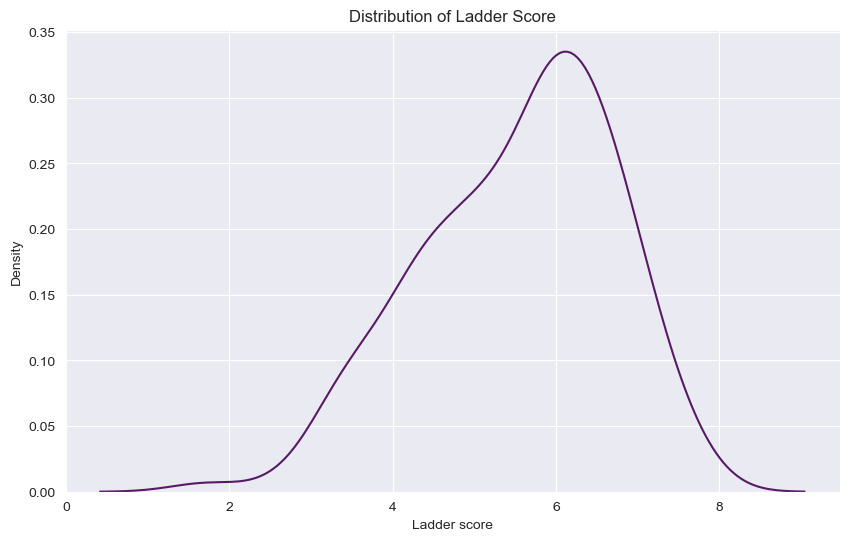

In [13]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x='Ladder score', color = "#571b66")
plt.title('Distribution of Ladder Score')
plt.xlabel('Ladder score')
plt.ylabel('Density')
plt.show()

Jest mało krajów osiągających poziom szczęścia mniejszy niż 2.5. Najwięcej krajów osiąga poziom szczęścia około 6.1. Od tej wartości można zaobserwować szybki spadek liczby krajów, a zatem mało krajów osiąga bardzo wysoki poziom szczęścia.

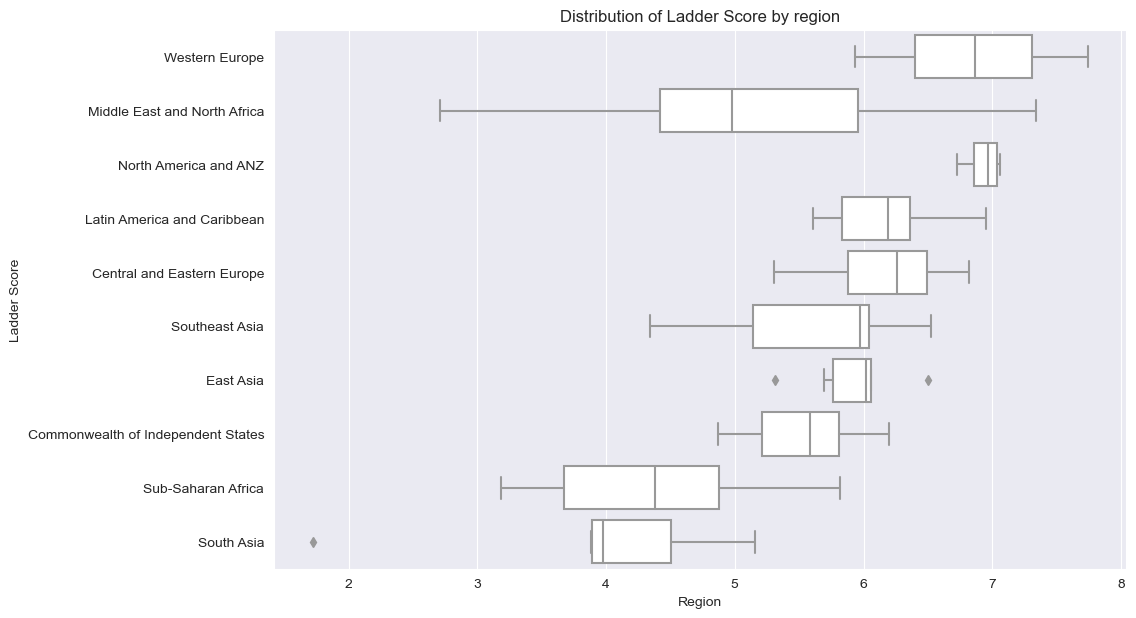

In [10]:
plt.figure(figsize=(11,7))
sns.boxplot(data = data, x='Ladder score', y='Regional indicator', color = 'white')
plt.title('Distribution of Ladder Score by region')
plt.xlabel('Region')
plt.ylabel('Ladder Score')
plt.show()

Regionem, w którym występują największe różnice w poziomie szczęścia jest Bliski Wschód i Afryka Północna. Najmniejsze różnice występują zaś w Ameryce Północnej i ANZ. Ameryka Północna i ANZ ma również największą medianę poziomu szczęścia. Najmniejszą medianą odznacza się Azja Południowa.

### Zależności w zbiorze danych

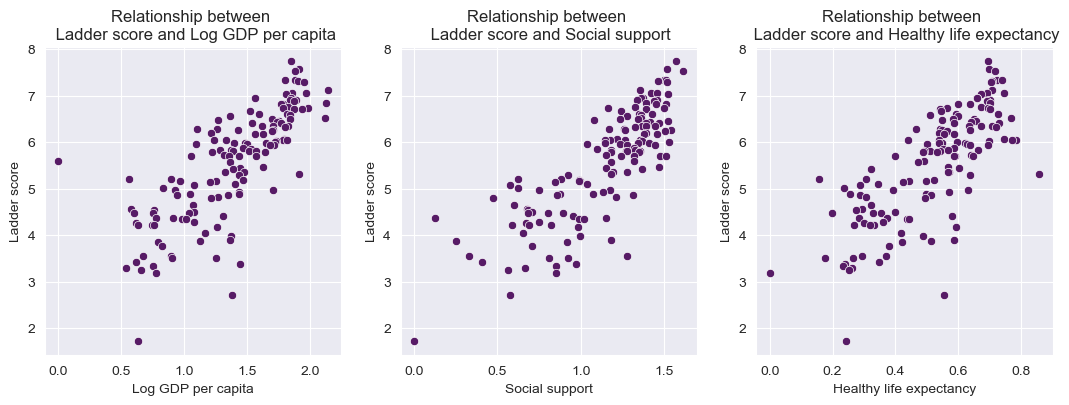

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(13,4))
sns.scatterplot(data=data, x='Log GDP per capita', y='Ladder score', ax=axes[0], color = "#571b66")
axes[0].set_title('Relationship between \n Ladder score and Log GDP per capita')
sns.scatterplot(data=data, x='Social support', y='Ladder score', ax=axes[1], color = "#571b66")
axes[1].set_title('Relationship between \n Ladder score and Social support')
sns.scatterplot(data=data, x='Healthy life expectancy', y='Ladder score', ax=axes[2], color = "#571b66")
axes[2].set_title('Relationship between \n Ladder score and Healthy life expectancy')
plt.show()

Możemy zauważyć, że wraz ze wzrostem PKB na mieszkańca, wsparcia społecznego czy oczekiwanej długości życia w zdrowiu rośnie poziom szczęścia.

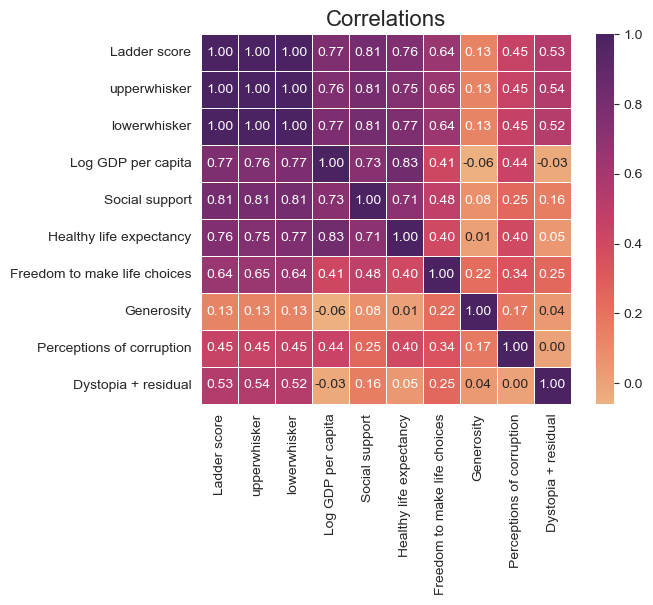

In [12]:
sns.heatmap(data.corr(numeric_only=True), 
            annot = True,
            cmap = 'flare',
            linewidths=0.5,
            fmt='.2f',
            square = True)
plt.title('Correlations', fontsize = 16)
plt.show()

Na powyższym wykresie widzimy, że poziom szczęścia, PKB na mieszkańca, wsparcie społeczne i oczekiwana długość życia w zdrowiu są ze sobą wysoce dodatnio skorelowane.